In [8]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(1, '../utils/')
from import_data import load_suite2p_outputs

In [5]:
fishlabel = '201007_F02_chx10'
plane = '70um'

df_summary = pd.read_csv('/network/lustre/iss01/wyart/analyses/2pehaviour/MLR_analyses/data_summary_II.csv', )

fish_mask = df_summary['fishlabel'] == fishlabel
plane_mask = df_summary['plane'] == plane

data_path = list(df_summary.loc[fish_mask & plane_mask, 'data_path'])[0]
output_path = list(df_summary.loc[fish_mask & plane_mask, 'output_path'])[0]
stim_path = list(df_summary.loc[fish_mask & plane_mask, 'stim_path'])[0]

# build struct to save all output from this script
struct = {}

struct['frame_rate'] = frame_rate = float(df_summary.loc[fish_mask & plane_mask, 'frameRate'])
struct['nSweeps'] = nSweeps = int(df_summary.loc[fish_mask & plane_mask, 'nSweeps'])
struct['nStim'] = nStim = int(df_summary.loc[fish_mask & plane_mask, 'nStim'])


F, Fneu, spks, stat, ops, iscell = load_suite2p_outputs('70um', data_path)

nFrames = F.shape[1]
time_indices = np.arange(nFrames)/frame_rate


In [6]:
sweep_duration = 10
# sweep_duration = abf.sweepLengthSec
# nSweeps = abf.sweepCount
time_to_stim = 0.1614
first_sweep_diff = 0.156

stim_trace = np.zeros((time_indices.shape))
stims_start_time = [np.nan]*nSweeps

sweep_start = 0
for sweep in range(nSweeps):
    
    # all variables bellow are time
    if sweep == 0:
        sweep_end = sweep_start + sweep_duration - first_sweep_diff
        stim_start = first_sweep_diff - time_to_stim
    else:
        sweep_end = sweep_start + sweep_duration
        stim_start = sweep_start + time_to_stim
    
    # these ones are frame_indices
    sweep_indices = np.where((time_indices >= sweep_start) & (time_indices < sweep_end))[0]
    stims_start_time[sweep] = stim_start
        
    sweep_start = sweep_end
    
# remove the ghost index of the stims start list
stims_start_time = stims_start_time[nSweeps-nStim:]
stims_start = [np.argmin(abs(time_indices-i)) for i in stims_start_time]

stim_trace[stims_start] = 1

[506, 675, 843, 1012, 1181, 1349, 1518, 1687, 1856]


Text(0.5, 0, 'Time [s]')

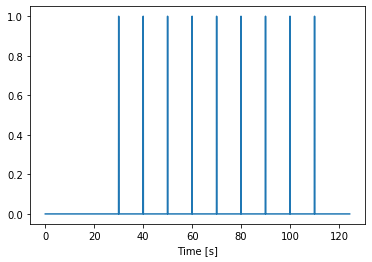

In [15]:
print(stims_start)

plt.plot(time_indices, stim_trace)
plt.xlabel('Time [s]')

In [ ]:
np.save('/network/lustre/iss01/wyart/analyses/mathilde.lapoix/MLR/Calcium_Imaging/201007_F02_chx10/stim_trace.npy', stim_trace)
np.save('/network/lustre/iss01/wyart/analyses/mathilde.lapoix/MLR/Calcium_Imaging/201007_F02_chx10/stims_start.npy', stims_start)